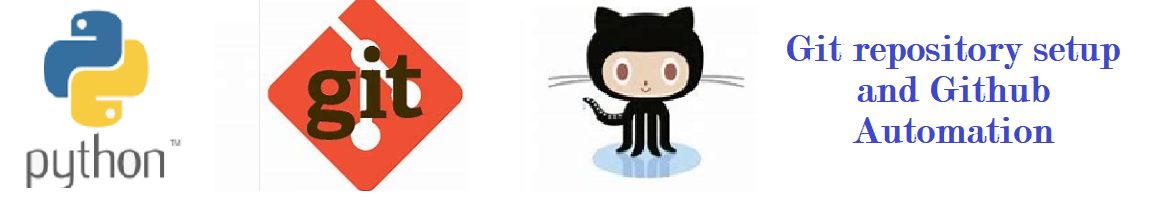

# Git repo Setup and Some Github Automation 
#### by Joe Eberle started on 08-01-2023

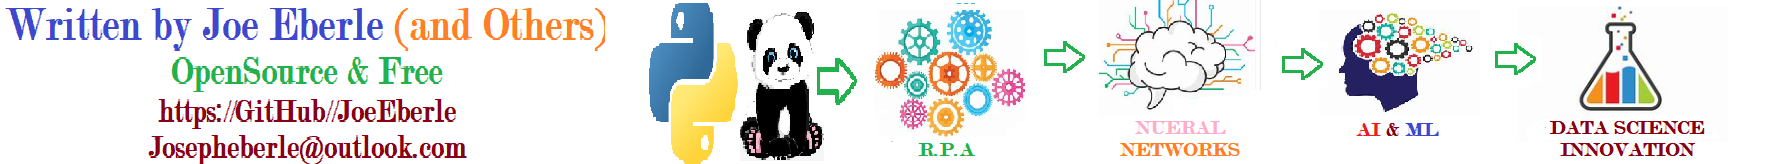

## Step 0 - Import all the libraries your need - expecially github 

In [19]:
# import the libraries necessary for the process 
import os, glob
import schedule
import time
from shutil import copyfile, copytree 
import talking_code as tc  
import schedule
import file_manager as fm 
import pandas as pd
from github import Github, GithubException
import requests
import shutil

## Step 0 - Initial PyGithub Library PIP Install 

In [2]:
first_time = False
if first_time:
    !pip install PyGithub

## Step 0 - Initial GIT Configuration - One time setup only

In [3]:
# Configure tooling
configuring_get = False 

if configuring_get:
    # Configure user information for all local repositories
    !git config --global user.name "Joe Eberle"

    # Sets the name you want attached to your commit transactions
    !git config --global user.email "josepheberle@outlook.com"

## Step 0 - Initialize the logger and configure talking log

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 

# Establish some parameters 
solution_name = 'git_commands'
current_working_directory = os.getcwd() 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(True)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Process.') 

Process git_commands Step 0 - Initializing and starting Process.


## Optional Step 0 - Quickly explain the purpose of the project 

In [8]:
talking_code = True
if talking_code:
    tc.say("Git is a distributed version control system designed to track changes in source code during software development, allowing multiple developers to collaborate, manage different versions, and merge their work seamlessly. It enables efficient code management, fosters collaboration, and ensures the integrity and history of a project's development.")
else:
    print("Git is a distributed version control system designed to track changes in source code during software development, allowing multiple developers to collaborate, manage different versions, and merge their work seamlessly. It enables efficient code management, fosters collaboration, and ensures the integrity and history of a project's development.")       

In [6]:
talking_code = True
if talking_code:
    ql.talk("Git is a distributed version control system designed to track changes in source code during software development, allowing multiple developers to collaborate, manage different versions, and merge their work seamlessly. It enables efficient code management, fosters collaboration, and ensures the integrity and history of a project's development.")
else:
    print("Git is a distributed version control system designed to track changes in source code during software development, allowing multiple developers to collaborate, manage different versions, and merge their work seamlessly. It enables efficient code management, fosters collaboration, and ensures the integrity and history of a project's development.")       

## Step 0 - Obfuscate the API Key used for automation

In [9]:
def get_API_Key():
    gh1 = 'ghp_OHqZ1PXlMX969zO'
    gh2 = '7ivA3L0UHL'
    gh3 = 'fmdGS0it6qM'
    return  gh1 + gh2 + gh3 

ql.pvlog('info',f'Process {solution_name} Step 0 - provide function to get the API Key used for automation.') 

Process git_commands Step 0 - provide function to get the API Key used for automation.


In [ ]:
# echo "# infrastructure_setup" >> README.md
# git init
# git add README.md
# git commit -m "first commit"
# git branch -M main
# git remote add origin https://github.com/JoeEberle/infrastructure_setup.git
# git push -u origin main


# echo "# remote_process_automation_excel" >> README.md
# git init
# git add README.md
# git commit -m "first commit"
# git branch -M main
# git remote add origin https://github.com/JoeEberle/remote_process_automation_excel.git
# git push -u origin main

In [ ]:
df_technology_solutions = pd.read_excel("c://working_directory//excel//technology solutions.xlsx")
solution_list = df_technology_solutions['Data Science Solution']
solution_list = [solution.strip().replace(' ', '_') for solution in solution_list]
solution_list = solution_list[:11]
print(solution_list)

df_technology_solutions.head(3)

## Step 1 - create project subdirectories for all python GIT repositories 

In [20]:
def create_directory_tree(directory):
    ''' The create_directory_tree function will create an organized directory for housing your files and infrastructure '''
    logging.info(f'{solution_name} - Step 1 establish infrastructure directory to organize all files')       
    status = 'Creating Directories: \n' + '\n' + fm.create_directory(directory)
    directory_list = ['updating_libraries','talking_code','system_information','logging_and_debugging' 
                      ,'infrastructure_setup','remote_process_automation_excel','data_discovery','Data_profiling'
                      ,'task_scheduling','data_delta_calculator','word_cloud','simple_chatbot_NLP_response' 
                      ,'intelligent_chatbot_web_scrapping','intelligent_chatbot_corpus_Learning' 
                      ,'intelligent_chatbot_data_serialization', 'intelligent_chatbot_generative_digital_assistent' 
                      ,'library_registry','solution_registry','design_goals','glossary_of_terms'
                      ,'data_loader_reference_tables','data_loader_transactional_tables'                      
                      ,'recurrent_nueral_network_chatbot_response_generator','correlation_heatmap']
    
    directory_list = [ 'talking_code','system_information','logging_and_debugging','git_commands','file_watchdog' 
                      ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings'
                      ,'correlation_heatmap','github_automation'] 
    
    
    for subdir in directory_list:
        status = status + '\n' + fm.create_directory(directory + '//' + subdir)
        logging.info(f'{solution_name} - Creating if non-existent : {directory + "/" + subdir}')                
    return status 

developing_and_testing = True # Unit test for this function  - set this to True or False to turn testing on or off 
if developing_and_testing:
    infrastructure_directory = "c://projects"
    if len(infrastructure_directory)  < 3:
        status = create_directory_tree('c://projects') # establish a default if none exists
    status = create_directory_tree(infrastructure_directory)        
    ql.pvlog('info',f'Process {solution_name} Step 1 - create project subdirectories for all python GIT repositories.') 
    print(status)

Process git_commands Step 1 - create project subdirectories for all python GIT repositories.
Creating Directories: 

Error attempting to create directory:c://projects
Error attempting to create directory:c://projects//talking_code
Error attempting to create directory:c://projects//system_information
Error attempting to create directory:c://projects//logging_and_debugging
Error attempting to create directory:c://projects//git_commands
Error attempting to create directory:c://projects//file_watchdog
Error attempting to create directory:c://projects//infrastructure_setup
Error attempting to create directory:c://projects//remote_process_automation_excel
Error attempting to create directory:c://projects//Data_profiling
Error attempting to create directory:c://projects//configuring_settings
Error attempting to create directory:c://projects//correlation_heatmap
Directory:c://projects//github_automation created


## Step 2 - Copy the latest notebooks to appropriate local git repository

In [22]:
def copy_jupyter_notebook_to_git_repo(source_directory, target_directory, notebook_name):
    # Get the full path for the source and target directories
    source_directory = os.path.abspath(source_directory)
    target_directory = os.path.abspath(target_directory)

    # Check if the source directory exists
    if not os.path.exists(source_directory):
        print(f"Error: Source directory '{source_directory}' does not exist.")
        return

    # Check if the target directory exists
    if not os.path.exists(target_directory):
        print(f"Error: Target directory '{target_directory}' does not exist.")
        return

    # Create the target subdirectory within the target directory
    subdirectory_name = os.path.splitext(notebook_name)[0]
    target_subdirectory = os.path.join(target_directory, subdirectory_name)
    if not os.path.exists(target_subdirectory):
        os.makedirs(target_subdirectory)

    # Get the full path for the source notebook file
    source_notebook_path = os.path.join(source_directory, notebook_name)

    # Check if the source notebook file exists
    if not os.path.exists(source_notebook_path):
        print(f"Error: Source notebook '{source_notebook_path}' does not exist.")
        return

    # Copy the notebook to the target subdirectory
    target_notebook_path = os.path.join(target_subdirectory, notebook_name)
    shutil.copy2(source_notebook_path, target_notebook_path)

    print(f"Jupyter notebook has been copied to the git repository {target_notebook_path} successfully!")

developing_and_testing = True    
if developing_and_testing:
    # Example usage:
    source_directory = r"C:\users\josep"
    target_directory = r"C:\projects"
    
    directory_list = ['updateing_libraries','talking_code','system_information','logging_and_debugging' 
                      ,'infrastructure_setup','remote_process_automation_excel','data_discovery','Data_profiling'
                      ,'task_scheduling','data_delta_calculator','word_cloud','simple_chatbot_NLP_response' 
                      ,'intelligent_chatbot_web_scrapping','intelligent_chatbot_corpus_Learning' 
                      ,'intelligent_chatbot_data_serialization', 'intelligent_chatbot_generative_digital_assistent' 
                      ,'library_registry','solution_registry','design_goals','glossary_of_terms'
                      ,'data_loader_reference_tables','sdata_loader_transactional_tables'                      
                      ,'recurrent_nueral_network_chatbot_response_generator']   
    
    directory_list = [ 'talking_code','system_information','logging_and_debugging','git_commands','file_watchdog' 
                      ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings'
                      ,'correlation_heatmap','github_automation'] 
    
    for notebook in directory_list:
        notebook_name = notebook + ".ipynb"
        copy_jupyter_notebook_to_git_repo(source_directory, target_directory, notebook_name)
        
    ql.pvlog('info',f'Process {solution_name} Step 2 - Copy the latest notebooks to appropriate local git repository.') 
        


Jupyter notebook has been copied to the git repository C:\projects\talking_code\talking_code.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\system_information\system_information.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\logging_and_debugging\logging_and_debugging.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\git_commands\git_commands.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\file_watchdog\file_watchdog.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\infrastructure_setup\infrastructure_setup.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\remote_process_automation_excel\remote_process_automation_excel.ipynb successfully!
Jupyter notebook has been copied to the git repository C:\projects\Data_profiling\Data_profiling.ipynb successfully!
Jupyte

## Step 3 - Copy any of your global use python libraries to the local git repositories 

In [26]:
    source_directory = r"C:\users\josep"
    target_directory = r"C:\projects"
    
    directory_list = ['updateing_libraries','talking_code','system_information','logging_and_debugging' 
                      ,'infrastructure_setup','remote_process_automation_excel','data_discovery','Data_profiling'
                      ,'task_scheduling','data_delta_calculator','word_cloud','simple_chatbot_NLP_response' 
                      ,'intelligent_chatbot_web_scrapping','intelligent_chatbot_corpus_Learning' 
                      ,'intelligent_chatbot_data_serialization', 'intelligent_chatbot_generative_digital_assistent' 
                      ,'library_registry','solution_registry','design_goals','glossary_of_terms'
                      ,'data_loader_reference_tables','sdata_loader_transactional_tables'                      
                      ,'recurrent_nueral_network_chatbot_response_generator']  
    
    directory_list = [ 'talking_code','system_information','logging_and_debugging','git_commands','file_watchdog' 
                      ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings'
                      ,'correlation_heatmap','github_automation'] 
      
    
    python_list = ['talking_code.py','quick_logger.py','file_manager.py','joe_logo.png']   
    
    for dir in directory_list:
        repo_name = target_directory + '\\' + dir 
        print (f"\n\n\nrepo :{repo_name}")
        for py_name in python_list:
            file_name = source_directory + '\\' + py_name 
            status = shutil.copy2(file_name, repo_name)
            print(f"copy status {status} for {file_name} to {repo_name}")
            
        if repo_name == 'C:\projects\remote_process_automation_excel':
            print('FOUND {repo_name}')
            file_name = 'rpa_excel.py'
            status = shutil.copy2(file_name, repo_name)
            print(f"SPECIAL copy status {status} for {file_name} to {repo_name}")
            file_name = 'remote_process_automation_excel.ipynb'
            status = shutil.copy2(file_name, repo_name)
            print(f"SPECIAL copy status {status} for {file_name} to {repo_name}")                

#         if repo_name == 'C:\projects\configuring_settings':   
#             file_name = 'solution_documentation_configuring_settings.py'
#             status = shutil.copy2(file_name, repo_name)
#             print(f"SPECIAL copy status {status} for {file_name} to {repo_name}")

#         if repo_name == 'C:\projects\logging_and_debugging': 
#             file_name = 'solution_documentation_logging_and_debugging.py'
#             status = shutil.copy2(file_name, repo_name)
#             print(f"SPECIAL copy status {status} for {file_name} to {repo_name}")                
                
            
    ql.pvlog('info',f'Process {solution_name}  Step 3 - Copy any of your global use python libraries to the local git repositories .') 




repo :C:\projects\talking_code
copy status C:\projects\talking_code\talking_code.py for C:\users\josep\talking_code.py to C:\projects\talking_code
copy status C:\projects\talking_code\quick_logger.py for C:\users\josep\quick_logger.py to C:\projects\talking_code
copy status C:\projects\talking_code\file_manager.py for C:\users\josep\file_manager.py to C:\projects\talking_code
copy status C:\projects\talking_code\joe_logo.png for C:\users\josep\joe_logo.png to C:\projects\talking_code



repo :C:\projects\system_information
copy status C:\projects\system_information\talking_code.py for C:\users\josep\talking_code.py to C:\projects\system_information
copy status C:\projects\system_information\quick_logger.py for C:\users\josep\quick_logger.py to C:\projects\system_information
copy status C:\projects\system_information\file_manager.py for C:\users\josep\file_manager.py to C:\projects\system_information
copy status C:\projects\system_information\joe_logo.png for C:\users\josep\joe_logo.

## Step 4 - Add and commit current updates to the local git repositories 

In [27]:
import os
import subprocess
import requests

def commit_update_to_local_git(subdirectory):
    # Change to the specified subdirectory
    os.chdir(subdirectory)

    # Add all changes to the repository
    subprocess.run(["git", "add", "."])

    # Commit the changes
    subprocess.run(["git", "commit", "-m", "Update files"])

#     # Push the changes to the remote repository with the "--force" flag
#     subprocess.run(["git", "push", "--force"])

    print(f"Local git update to local repository: {subdirectory} successfully!")
    

developing_and_testing = True    

if developing_and_testing:
    
    directory_list = [ 'talking_code','system_information','logging_and_debugging','git_commands','file_watchdog' 
                      ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings'
                      ,'correlation_heatmap','github_automation']   
   
    for subdir in directory_list:
        subdirectory_path = "c://projects//" + subdir
        commit_update_to_local_git(subdirectory_path)
    
    ql.pvlog('info',f'Process {solution_name}  Step 4 - Add and commit current updates to the local git repositories.')


Local git update to local repository: c://projects//talking_code successfully!
Local git update to local repository: c://projects//system_information successfully!
Local git update to local repository: c://projects//logging_and_debugging successfully!
Local git update to local repository: c://projects//git_commands successfully!
Local git update to local repository: c://projects//file_watchdog successfully!
Local git update to local repository: c://projects//infrastructure_setup successfully!
Local git update to local repository: c://projects//remote_process_automation_excel successfully!
Local git update to local repository: c://projects//Data_profiling successfully!
Local git update to local repository: c://projects//configuring_settings successfully!
Local git update to local repository: c://projects//correlation_heatmap successfully!
Local git update to local repository: c://projects//github_automation successfully!
Process git_commands  Step 4 - Add and commit current updates to t

In [ ]:
tc.say("GitHub is a web-based platform that provides hosting for Git repositories, offering tools for code collaboration, version control, issue tracking, and project management.")

## Step 5 - Create remote github repositories for any solutions that dont already have a github repository.

In [28]:
import requests

def create_github_repo(api_key, repo_name):
    # Set the GitHub API endpoint
    url = "https://api.github.com/user/repos"

    # Set the request headers
    headers = {
        "Authorization": f"token {api_key}",
        "Accept": "application/vnd.github.v3+json"
    }

    # Set the request payload
    payload = {
        "name": repo_name,
        "private": False  # Set this to True if you want a private repository
    }

    try:
        # Send the POST request to create the repository
        response = requests.post(url, headers=headers, json=payload)

        if response.status_code == 201:
            print(f"Repository '{repo_name}' has been created successfully on GitHub!")
        else:
            print(f"Failed to create the repository. Status code: {response.status_code}")
            print(response.json())

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # Example usage:
    
    directory_list = ['updating_libraries','talking_code','system_information','logging_and_debugging' 
                      ,'infrastructure_setup','remote_process_automation_excel','data_discovery','Data_profiling'
                      ,'task_scheduling','data_delta_calculator','word_cloud','simple_chatbot_NLP_response' 
                      ,'intelligent_chatbot_web_scrapping','intelligent_chatbot_corpus_Learning' 
                      ,'intelligent_chatbot_data_serialization', 'intelligent_chatbot_generative_digital_assistent' 
                      ,'library_registry','solution_registry','design_goals','glossary_of_terms'
                      ,'data_loader_reference_tables','data_loader_transactional_tables'                      
                      ,'recurrent_nueral_network_chatbot_response_generator']
    
    
    directory_list = [ 'talking_code','system_information','logging_and_debugging','git_commands','file_watchdog' 
                      ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings'
                      ,'correlation_heatmap','github_automation'] 
    
 
 
 
    for repository_name  in directory_list:
        create_github_repo(get_API_Key(), repository_name)
    ql.pvlog('info',f'Process {solution_name}  Step 5 - Create remote github repositories for any solutions that dont already have a github repository. ')         


Failed to create the repository. Status code: 422
{'message': 'Repository creation failed.', 'errors': [{'resource': 'Repository', 'code': 'custom', 'field': 'name', 'message': 'name already exists on this account'}], 'documentation_url': 'https://docs.github.com/rest/repos/repos#create-a-repository-for-the-authenticated-user'}
Failed to create the repository. Status code: 422
{'message': 'Repository creation failed.', 'errors': [{'resource': 'Repository', 'code': 'custom', 'field': 'name', 'message': 'name already exists on this account'}], 'documentation_url': 'https://docs.github.com/rest/repos/repos#create-a-repository-for-the-authenticated-user'}
Failed to create the repository. Status code: 422
{'message': 'Repository creation failed.', 'errors': [{'resource': 'Repository', 'code': 'custom', 'field': 'name', 'message': 'name already exists on this account'}], 'documentation_url': 'https://docs.github.com/rest/repos/repos#create-a-repository-for-the-authenticated-user'}
Failed to 

In [ ]:
import os
from git import Repo, GitCommandError

def update_github(source_dir, remote_repo_name):
    try:
        # Initialize the repository
        repo = Repo.init(source_dir)
        
        # Add all files to the index
        repo.index.add(repo.untracked_files)
        
        # Commit changes
        commit_message = "Update repository"
        repo.index.commit(commit_message)
        
        # Check if 'origin' remote exists, if not, add it
        origin = None
        for remote in repo.remotes:
            if remote.name == 'origin':
                origin = remote
                break
        if not origin:
            origin = repo.create_remote('origin', remote_repo_name)
        
        # Push changes to the remote repository
        branch = repo.active_branch
        if not branch.tracking_branch():
            origin.push(branch)
        else:
            origin.push()
        
        return 0  # Success status code
    
    except GitCommandError as e:
        return e.status  # Return the Git command error status code
    
# Example usage
source_directory = 'c://projects//talking_code'
remote_repository = 'https://github.com/JoeEberle/talking_code.git'


developing_and_testing = True 
        
if developing_and_testing:
#     directory_list = [ 'talking_code','system_information','logging_and_debugging', 'git_commands' 
#                   ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings']
    
    directory_list = ['system_information', 'git_commands','configuring_settings']    
    
    for idx, repository_name  in enumerate(directory_list):
        print(f"Pushing local git repository: {source_directory} to remote github: {repository_name}")
        source_directory = 'c://projects//' + repository_name
        remote_repository = 'https://github.com/JoeEberle/' + repository_name + ".git"
        status_code = update_github(source_directory, remote_repository)

        if status_code == 0:
            print(f"{repository_name} Update successful!")
            ql.pvlog('info',f'Process {solution_name}  Step 6.{idx} - Succesfull Pushing local git {repository_name} to appropriate github repository. ')  
        else:
            print(f"{repository_name} Update failed with status code: {status_code}")
            ql.pvlog('info',f'Process {solution_name}  Step 6.{idx} - Unsuccessfull Pushing local git {repository_name} to appropriate github repository. ')  


In [ ]:
import os
import subprocess
import requests

gh1 = 'ghp_OHqZ1PXlMX969zO'
gh2 = '7ivA3L0UHL'
gh3 = 'fmdGS0it6qM'

def initialize_git_and_upload_to_github(subdirectory, github_token, github_repo_name, github_user_name):
    # Change to the specified subdirectory
    os.chdir(subdirectory)

    # Initialize a new git repository
    subprocess.run(["git", "init"])

    # Add all files to the repository
    subprocess.run(["git", "add", "."])

    # Commit the changes
    subprocess.run(["git", "commit", "-m", "Initial commit"])

    # Set up the GitHub repository URL
    github_repo_url = f"https://github.com/{github_user_name}/{github_repo_name}.git"

    # Add the GitHub repository as the remote origin
    subprocess.run(["git", "remote", "add", "origin", github_repo_url])

    # Push the changes to the GitHub repository
    subprocess.run(["git", "push", "-u", "origin", "master"])

    print(f"All files for repository {github_repo_name} have been uploaded to GitHub successfully!")

    
developing_and_testing = True    
if developing_and_testing:
    subdirectory = 'c:\\projects\\talking_code'
    github_repo_name = 'talking_code'
    github_user_name = 'JoeEberle'
    
   
    repository_list = [ 'talking_code','system_information','logging_and_debugging' 
                  ,'infrastructure_setup','remote_process_automation_excel','Data_profiling','configuring_settings']
    
    
    for repo in repository_list:
        initialize_git_and_upload_to_github(subdirectory, get_API_Key(), repo, github_user_name)
    
    


In [ ]:
import requests

def list_github_repositories(username, token):
    headers = {
        'Authorization': f'Token {token}'
    }
    
    url = f'https://api.github.com/users/{username}/repos'
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        repositories = response.json()
        return repositories
    else:
        print(f"Failed to fetch repositories. Status code: {response.status_code}")
        return []

if __name__ == "__main__":
    github_username = "your_username"
    github_token = "your_personal_access_token"
    
    repositories = list_github_repositories(github_username, github_token)
    
    if repositories:
        print("Your GitHub repositories:")
        for repo in repositories:
            print(repo["name"])
    else:
        print("No repositories found.")


In [ ]:
g = Github(get_API_Key())
for idx, repo in enumerate(g.get_user().get_repos()):
    try:
        repo_contents = repo.get_contents("")
        number_of_files = len(repo_contents)
        print(f"Github Repository {idx}: {repo.full_name} has {number_of_files} Files")
    except GithubException as e:
        if e.status == 404:
            print(f"Github Repository {idx}: {repo.full_name} ERROR -  repository is EMPTY")
        else:
            print(f"An error occurred: {e}")     
    

In [ ]:
repo_content = repo.get_contents("")
for idx, content_file in enumerate(repo_content):
    print(f'Repostory Content {idx}: {content_file}')

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [ ]:
import os 
cwd = os.getcwd()
print(f'Current Working Directory :{cwd}')  
cwd = os.chdir('C:\\projects\\talking_code')
cwd = os.getcwd()
print(f'After change direct Working Directory :{cwd}')   
!echo "Talking Code" 
!dir

## Step 0 - GIT COMMANDS for making changes to git repository 

In [ ]:
echo "# git_commands" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/JoeEberle/git_commands.git
git push -u origin main

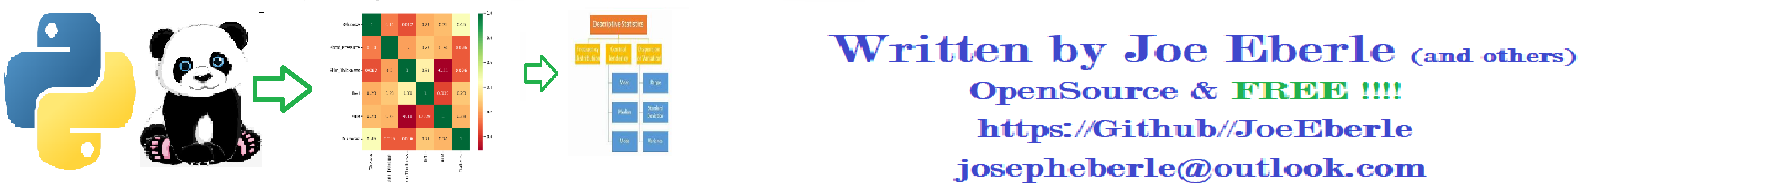

# https://github.com/JoeEberle/
# josepheberle@outlook.com

# echo "# configuring_settings" >> README.md
# git init
# git add README.md
# git commit -m "first commit"
# git branch -M main
# git remote add origin https://github.com/JoeEberle/configuring_settings.git
# git push -u origin main


# git remote add origin https://github.com/JoeEberle/configuring_settings.git
# git branch -M main
# git push -u origin main